# Bitcoin Price. Prediction by ARIMA

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from itertools import product

from scipy import stats

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

## Data Exploration

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/btc2usd/BTC2USD.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_day = df.resample('D').mean()
df_day.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [24]:
df_day[df_day.isna().any(axis=1)]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loc['2015-01-06':'2015-01-08']

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,


In [16]:
df.loc['2015-01-09']

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2015-01-09 21:05:00,2015-01-09 21:05:00,272.45,305.00,272.45,291.10,175.837078,50502.066285,287.209426
2015-01-09 21:06:00,2015-01-09 21:06:00,294.52,294.52,291.15,294.49,126.501816,37173.872182,293.860384
2015-01-09 21:07:00,2015-01-09 21:07:00,294.49,298.92,294.49,298.91,317.465960,94205.755015,296.742854
2015-01-09 21:08:00,2015-01-09 21:08:00,297.14,298.99,296.00,297.15,144.501721,42982.661491,297.454322
2015-01-09 21:09:00,2015-01-09 21:09:00,297.15,298.99,297.15,298.84,116.731757,34745.009224,297.648301
...,...,...,...,...,...,...,...,...
2015-01-09 23:55:00,2015-01-09 23:55:00,294.03,294.54,293.84,293.97,1.180583,347.072227,293.983684
2015-01-09 23:56:00,2015-01-09 23:56:00,293.88,294.00,293.87,293.97,6.998855,2056.990318,293.903835
2015-01-09 23:57:00,2015-01-09 23:57:00,293.99,294.35,293.85,294.31,16.687687,4907.931349,294.104947


In [20]:
# Resampling to monthly frequency
df_month = df.resample('M').mean()
df_month

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091
...,...,...,...,...,...,...,...
2020-11-30,16535.778528,16545.663704,16525.571002,16536.023486,6.695166,111021.991229,16535.990325
2020-12-31,21811.751812,21826.119052,21796.889787,21812.155606,5.742400,129237.684380,21811.782847
2021-01-31,34554.125793,34594.169353,34512.497779,34554.252479,10.253061,352510.183906,34552.337249


In [25]:
df_month[df_month.isna().any(axis=1)]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,


In [26]:
# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()
df_year

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-12-31,10.094570,10.097488,10.091053,10.093934,21.328197,216.485795,10.094143
2013-12-31,254.281420,254.658978,253.855315,254.264327,15.734087,4851.052777,254.242741
2014-12-31,527.132511,527.571308,526.679647,527.137609,12.617999,6568.182937,527.113071
2015-12-31,274.366745,274.509271,274.208588,274.364343,14.823699,4146.228635,274.353829
2016-12-31,558.906222,559.088461,558.701291,558.905550,5.658247,3159.519900,558.890451
2017-12-31,4155.221695,4159.353798,4150.157998,4155.146585,9.721584,45053.550037,4154.759504
2018-12-31,7576.803839,7582.514112,7570.686577,7576.778120,7.774885,60791.446371,7576.505596
2019-12-31,7427.136604,7431.551337,7422.596721,7426.850617,5.890939,45557.178460,7427.214436


In [27]:
df_year[df_year.isna().any(axis=1)]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,


In [28]:
# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()
df_Q

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-03-31,5.477714,5.479719,5.474339,5.476768,9.473001,49.282894,5.476890
2012-06-30,5.587766,5.589126,5.586414,5.587763,27.063281,155.714638,5.587793
2012-09-30,10.327893,10.332271,10.322662,10.326911,19.446149,197.766814,10.327578
2012-12-31,11.987362,11.989673,11.984587,11.986864,22.819409,275.620682,11.986756
2013-03-31,43.019036,43.044929,42.994735,43.019905,17.238208,628.532706,43.018216
2013-06-30,117.713107,117.846809,117.540730,117.690751,10.109828,1146.364677,117.693214
2013-09-30,104.781557,104.839017,104.720672,104.785309,13.318467,1367.448627,104.779632
2013-12-31,516.262563,517.139101,515.287529,516.231720,21.786352,11244.639020,516.174835


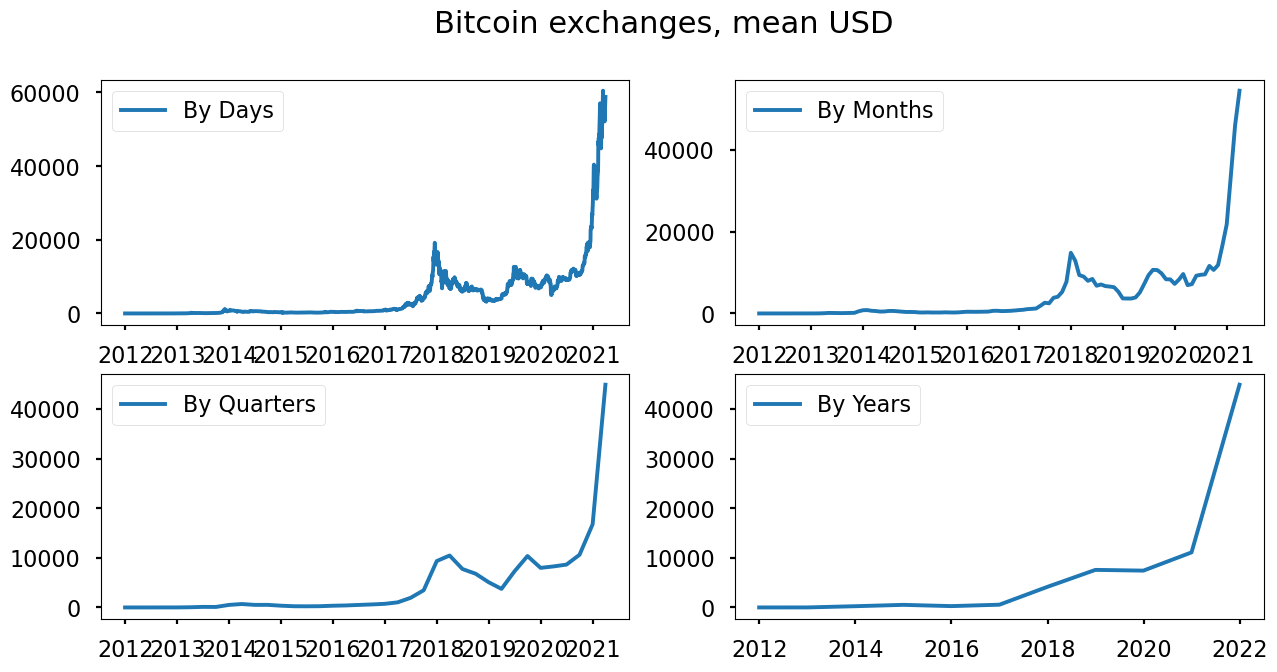

In [29]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df_day.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

I will predict bitcoin prices by months.

## Stationarity check and STL-decomposition of the series

Dickey–Fuller test: p=0.998833


<Figure size 1500x700 with 0 Axes>

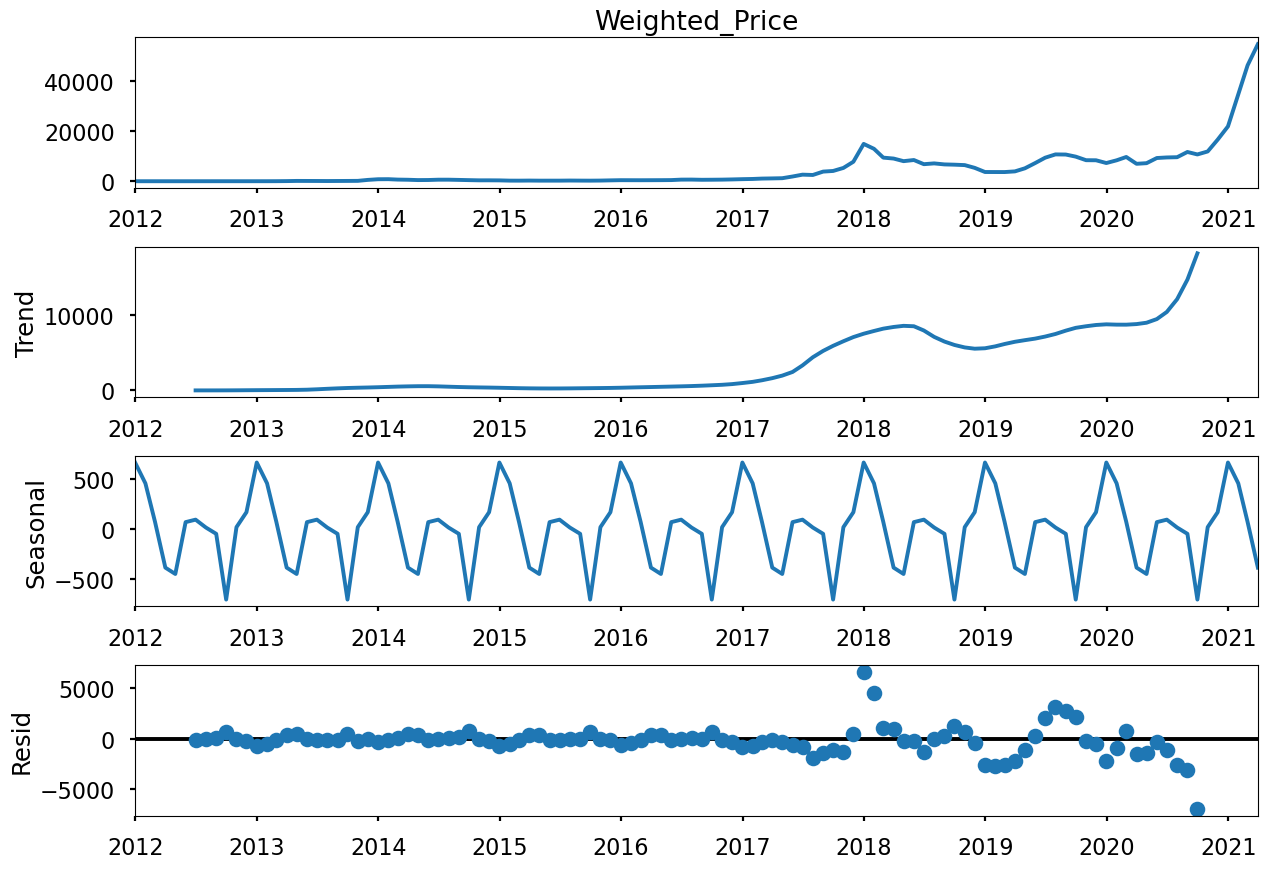

In [34]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()


> **The series are not stationary.**

## Box-Cox Transformations

In [35]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.998833


> **The series are not stationary.**

In [37]:
df_month[['Weighted_Price','Weighted_Price_box']]

,Weighted_Price,Weighted_Price_box
Timestamp,,
2011-12-31,4.471603,1.633738
2012-01-31,6.345955,2.057681
2012-02-29,5.228443,1.821004
2012-03-31,4.984397,1.763401
2012-04-30,4.995091,1.765977
...,...,...
2020-11-30,16535.990325,17.816634
2020-12-31,21811.782847,18.671516
2021-01-31,34552.337249,20.152970


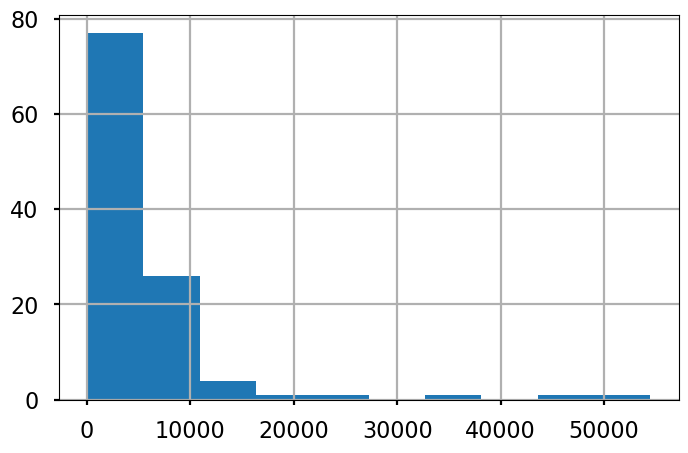

In [46]:
plt.figure(figsize=[8,5])
df_month.Weighted_Price.hist()
plt.show()

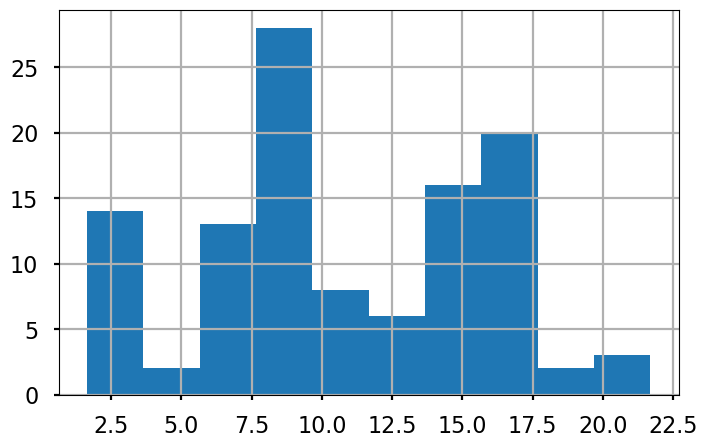

In [45]:
plt.figure(figsize=[8,5])
df_month['Weighted_Price_box'].hist()
plt.show()

## Seasonal differentiation

In [36]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.442190


> **The series are not stationary.**

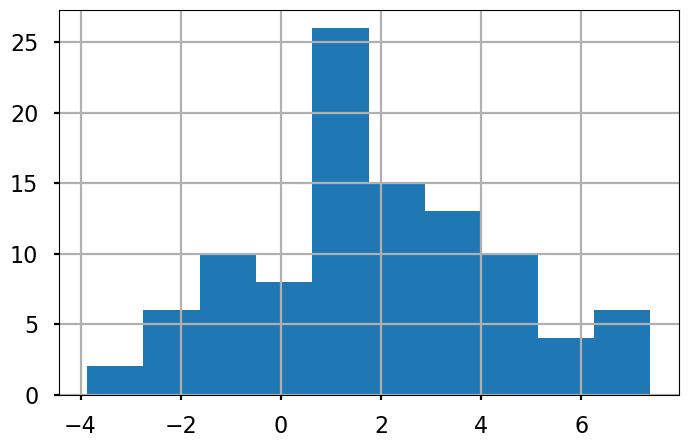

In [44]:
plt.figure(figsize=[8,5])
df_month['prices_box_diff'].hist()
plt.show()

## Regular differentiation

In [47]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)

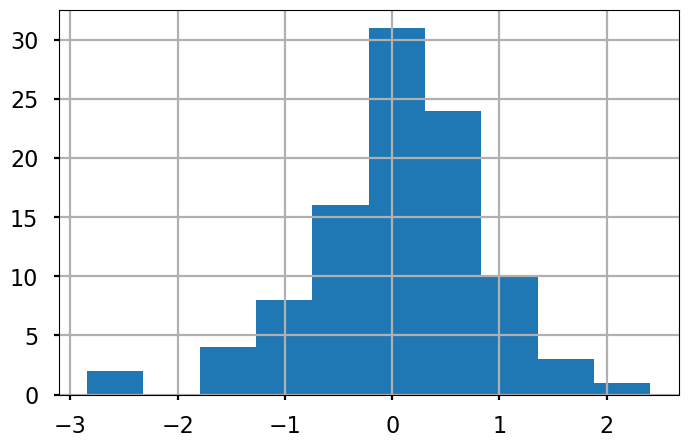

In [48]:
plt.figure(figsize=[8,5])
df_month['prices_box_diff2'].hist()
plt.show()

Dickey–Fuller test: p=0.000025


<Figure size 1500x700 with 0 Axes>

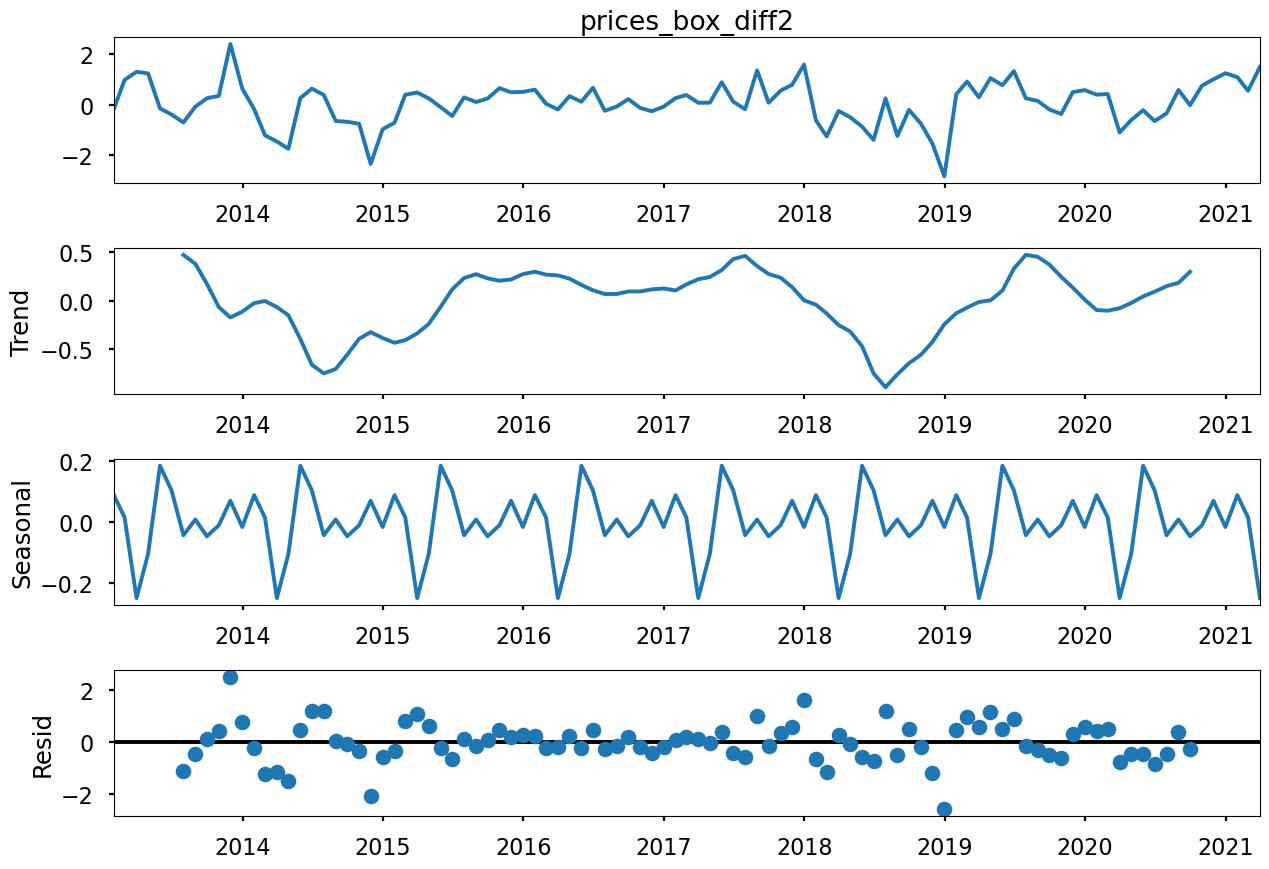

In [53]:

plt.figure(figsize=(15,7))
p_value = sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1]
print("Dickey–Fuller test: p=%f" % p_value)
# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
plt.show()

> **The series are stationary.**

## Model Selection

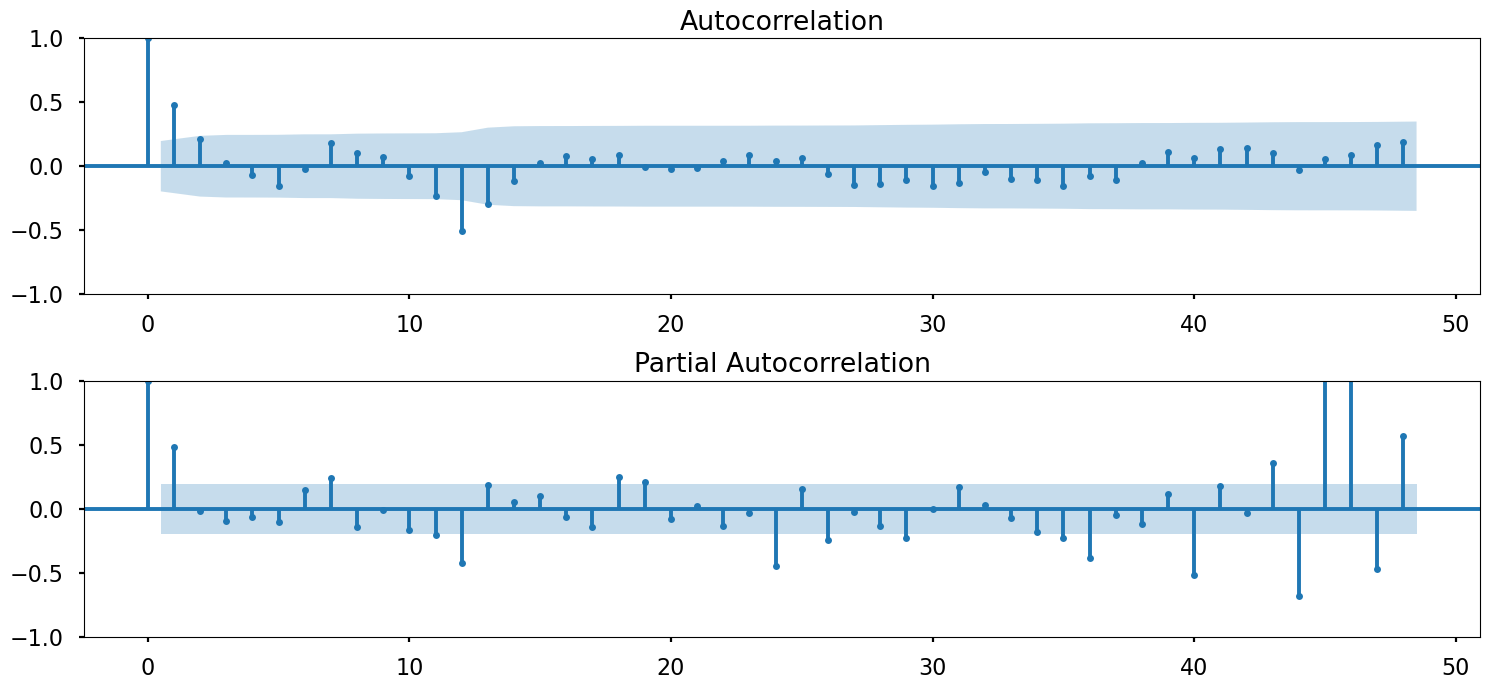

In [54]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [55]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [56]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  173.086162
21  (1, 0, 1, 1)  174.402438
7   (0, 1, 0, 1)  174.972738
25  (1, 1, 0, 1)  175.010174
37  (2, 0, 0, 1)  175.019050
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                  112
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -83.543
Date:                              Fri, 28 Apr 2023   AIC                            173.086
Time:                                      02:48:29   BIC                            180.872
Sample:                                  12-31-2011   HQIC                           176.236
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

## Analysis of residues

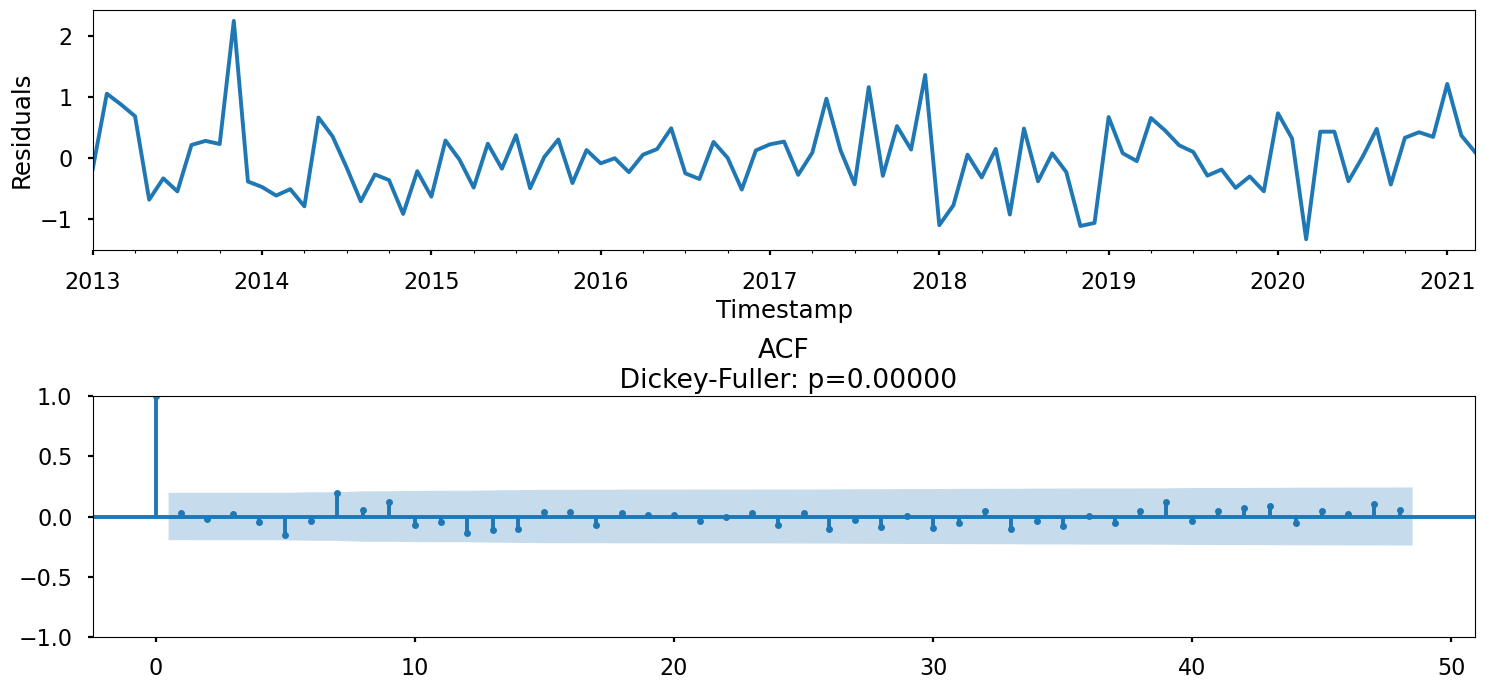

In [58]:
# STL-decomposition
plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

# print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])
p_value = sm.tsa.stattools.adfuller(best_model.resid[13:])[1]
ax.set_title('ACF\n Dickey-Fuller: p={0:.5f}'.format(p_value))

plt.tight_layout()
plt.show()

> **It`s OK.**

## Prediction

In [59]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [60]:
df_month[['Weighted_Price']]

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-31,6.345955
2012-02-29,5.228443
2012-03-31,4.984397
2012-04-30,4.995091
...,...
2020-11-30,16535.990325
2020-12-31,21811.782847
2021-01-31,34552.337249


In [66]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = pd.date_range('2021-04-01','2022-01-07', 
              freq='M')
future = pd.DataFrame(index=date_list, columns= df_month2.columns)
df_month2 = pd.concat([df_month2, future])
df_month2

,Weighted_Price
2011-12-31,4.471603
2012-01-31,6.345955
2012-02-29,5.228443
2012-03-31,4.984397
2012-04-30,4.995091
...,...
2021-08-31,NaN
2021-09-30,NaN
2021-10-31,NaN
2021-11-30,NaN


In [68]:
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=df_month2.shape[0]), lmbda)
df_month2

,Weighted_Price,forecast
2011-12-31,4.471603,1.000000
2012-01-31,6.345955,4.471604
2012-02-29,5.228443,6.345956
2012-03-31,4.984397,5.228443
2012-04-30,4.995091,4.984397
...,...,...
2021-08-31,NaN,79066.828720
2021-09-30,NaN,78112.806361
2021-10-31,NaN,80228.130614
2021-11-30,NaN,92529.115494


In [69]:
df_month2['forecast2'] = invboxcox(best_model.predict(start=0, end=df_month2.shape[0]-2), lmbda)
df_month2

,Weighted_Price,forecast,forecast2
2011-12-31,4.471603,1.000000,1.000000
2012-01-31,6.345955,4.471604,4.471604
2012-02-29,5.228443,6.345956,6.345956
2012-03-31,4.984397,5.228443,5.228443
2012-04-30,4.995091,4.984397,4.984397
...,...,...,...
2021-08-31,NaN,79066.828720,79066.828720
2021-09-30,NaN,78112.806361,78112.806361
2021-10-31,NaN,80228.130614,80228.130614
2021-11-30,NaN,92529.115494,92529.115494


In [71]:
df_month2.drop(columns = ['forecast2'], inplace=True)
df_month2

,Weighted_Price,forecast
2011-12-31,4.471603,1.000000
2012-01-31,6.345955,4.471604
2012-02-29,5.228443,6.345956
2012-03-31,4.984397,5.228443
2012-04-30,4.995091,4.984397
...,...,...
2021-08-31,NaN,79066.828720
2021-09-30,NaN,78112.806361
2021-10-31,NaN,80228.130614
2021-11-30,NaN,92529.115494


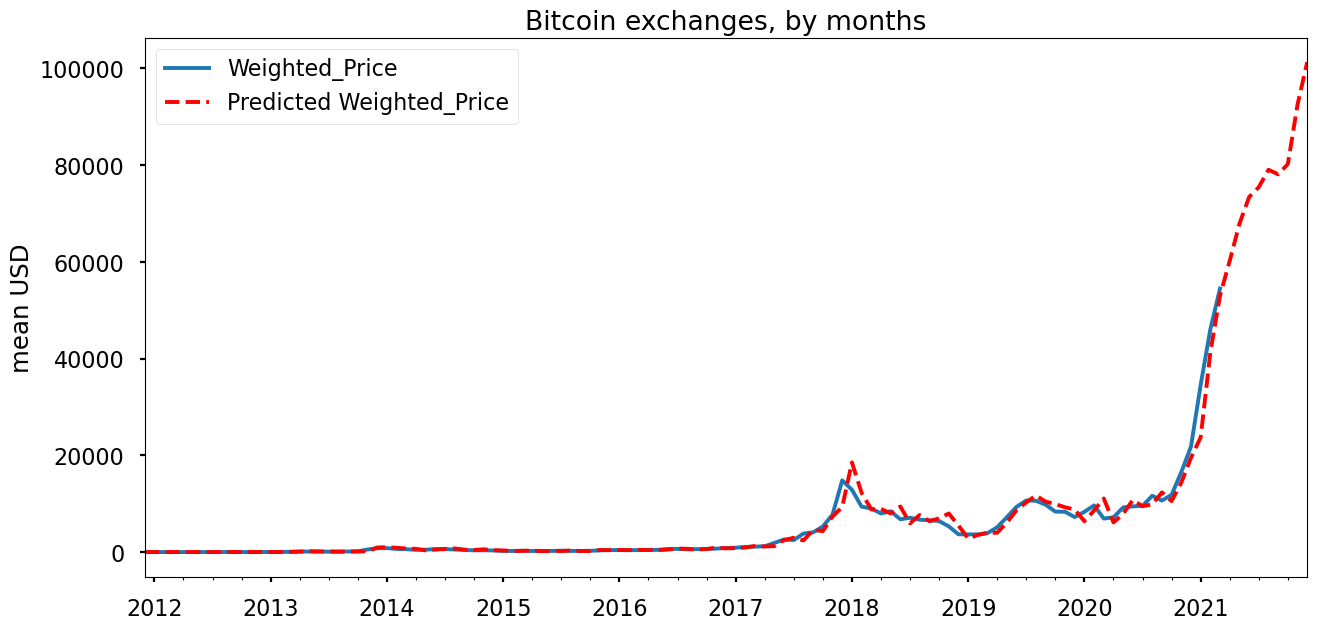

In [72]:
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()